<a href="https://colab.research.google.com/github/NeonHalo17/EDA/blob/main/EDA_DA_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#21BCE0359
#EDA

**MODULE 2**

Loading Dataset

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Males.csv")

df.head()

,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1,13,1980,14,1,no,other,no,no,1.197540,Business_and_Repair_Service,Service_Workers,north_east
1,2,13,1981,14,2,yes,other,no,no,1.853060,Personal_Service,Service_Workers,north_east
2,3,13,1982,14,3,no,other,no,no,1.344462,Business_and_Repair_Service,Service_Workers,north_east
3,4,13,1983,14,4,no,other,no,no,1.433213,Business_and_Repair_Service,Service_Workers,north_east
4,5,13,1984,14,5,no,other,no,no,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east


Dataset Dimensions

In [3]:
df.shape

(4360, 13)

Dataset Summary

In [4]:
df.describe()

,rownames,nr,year,school,exper,wage
count,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000
mean,2180.500000,5262.058716,1983.500000,11.766972,6.514679,1.649147
std,1258.767916,3496.149815,2.291551,1.746181,2.825873,0.532609
min,1.000000,13.000000,1980.000000,3.000000,0.000000,-3.579079
25%,1090.750000,2329.000000,1981.750000,11.000000,4.000000,1.350717
50%,2180.500000,4569.000000,1983.500000,12.000000,6.000000,1.671143
75%,3270.250000,8406.000000,1985.250000,12.000000,9.000000,1.991086
max,4360.000000,12548.000000,1987.000000,16.000000,18.000000,4.051860


Data types and null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    4360 non-null   int64  
 1   nr          4360 non-null   int64  
 2   year        4360 non-null   int64  
 3   school      4360 non-null   int64  
 4   exper       4360 non-null   int64  
 5   union       4360 non-null   object 
 6   ethn        4360 non-null   object 
 7   maried      4360 non-null   object 
 8   health      4360 non-null   object 
 9   wage        4360 non-null   float64
 10  industry    4360 non-null   object 
 11  occupation  4360 non-null   object 
 12  residence   3115 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 442.9+ KB


Data deduplication

In [6]:
df_deduplicated = df.drop_duplicates()

2. Replacing values: Replace 'yes' with 1 and 'no' with 0 in the columns 'union', 'maried', and 'health'


In [7]:
df_replaced = df_deduplicated.replace({'yes': 1, 'no': 0})

Discretization and binning: Bin the 'wage' column into categories (low, medium, high)


In [8]:
# Define wage bins and labels
wage_bins = [df_replaced['wage'].min(), 1.5, 2.5, df_replaced['wage'].max()]
wage_labels = ['Low', 'Medium', 'High']

Apply Binning

In [9]:
df_replaced['wage_bin'] = pd.cut(df_replaced['wage'], bins=wage_bins, labels=wage_labels, include_lowest=True)

Handling missing data: Check for missing data

In [10]:
df_replaced.isnull().sum()

,0
rownames,0
nr,0
year,0
school,0
exper,0
union,0
ethn,0
maried,0
health,0
wage,0


Fill missing numeric data with the mean and categorical data with the mode

In [11]:
df_filled = df_replaced.fillna({
    'nr': df_replaced['nr'].mean(),
    'school': df_replaced['school'].mean(),
    'exper': df_replaced['exper'].mean(),
    'union': df_replaced['union'].mode()[0],
    'ethn': df_replaced['ethn'].mode()[0],
    'maried': df_replaced['maried'].mode()[0],
    'health': df_replaced['health'].mode()[0],
    'wage': df_replaced['wage'].mean(),
    'industry': df_replaced['industry'].mode()[0],
    'occupation': df_replaced['occupation'].mode()[0],
    'residence': df_replaced['residence'].mode()[0]
})

In [12]:
df_filled.head()

,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence,wage_bin
0,1,13,1980,14,1,0,other,0,0,1.197540,Business_and_Repair_Service,Service_Workers,north_east,Low
1,2,13,1981,14,2,1,other,0,0,1.853060,Personal_Service,Service_Workers,north_east,Medium
2,3,13,1982,14,3,0,other,0,0,1.344462,Business_and_Repair_Service,Service_Workers,north_east,Low
3,4,13,1983,14,4,0,other,0,0,1.433213,Business_and_Repair_Service,Service_Workers,north_east,Low
4,5,13,1984,14,5,0,other,0,0,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east,Medium


Check null values after filling

In [13]:
df_filled.isnull().sum()

,0
rownames,0
nr,0
year,0
school,0
exper,0
union,0
ethn,0
maried,0
health,0
wage,0


**MODULE 3**

Library

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Univariate Analysis on Wage, School and exper columns

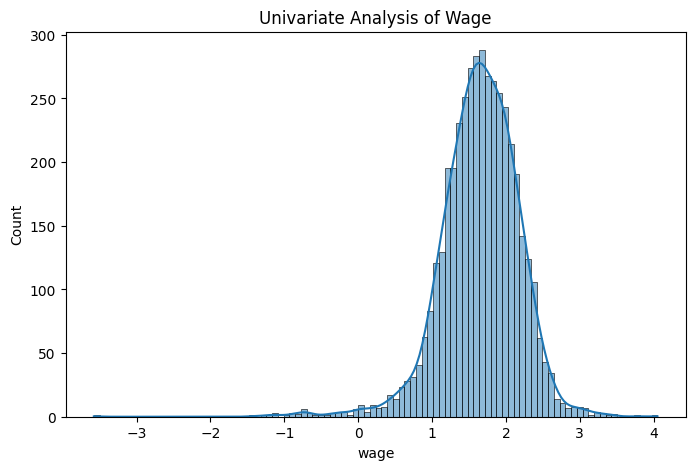

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filled['wage'], kde=True)
plt.title('Univariate Analysis of Wage')
plt.show()

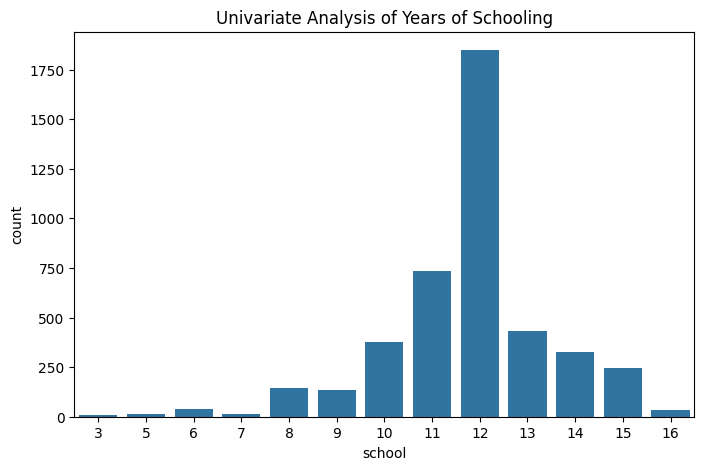

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='school', data=df_filled)
plt.title('Univariate Analysis of Years of Schooling')
plt.show()

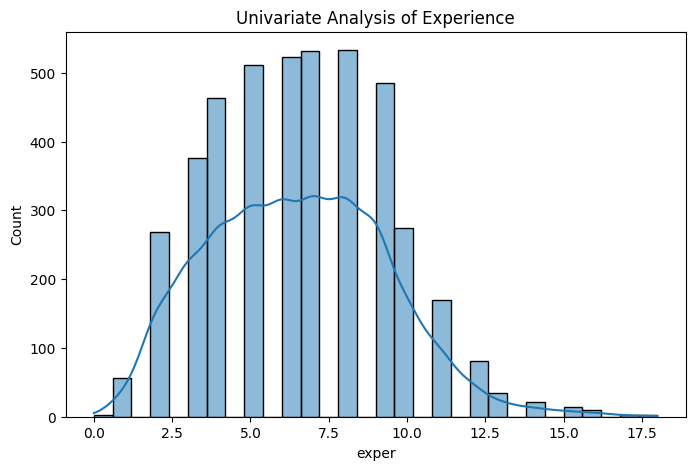

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filled['exper'], kde=True)
plt.title('Univariate Analysis of Experience')
plt.show()

Bivariate Analysis of Wage vs School and Wage vs experience

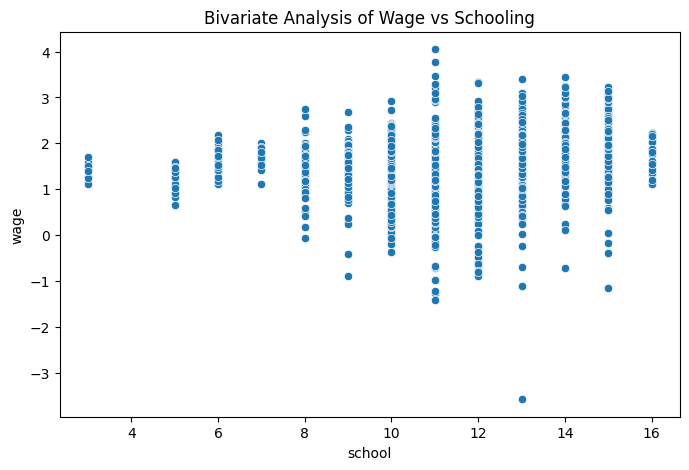

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='school', y='wage', data=df_filled)
plt.title('Bivariate Analysis of Wage vs Schooling')
plt.show()

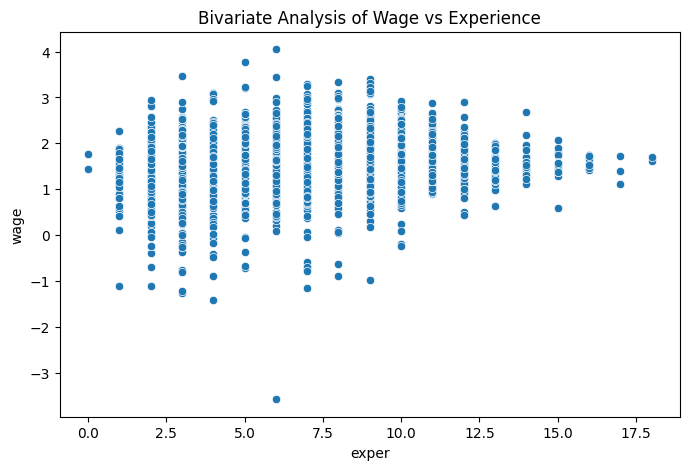

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='exper', y='wage', data=df_filled)
plt.title('Bivariate Analysis of Wage vs Experience')
plt.show()

Multivariate Analysis of Wage, School and experience altogether

<Figure size 1000x600 with 0 Axes>

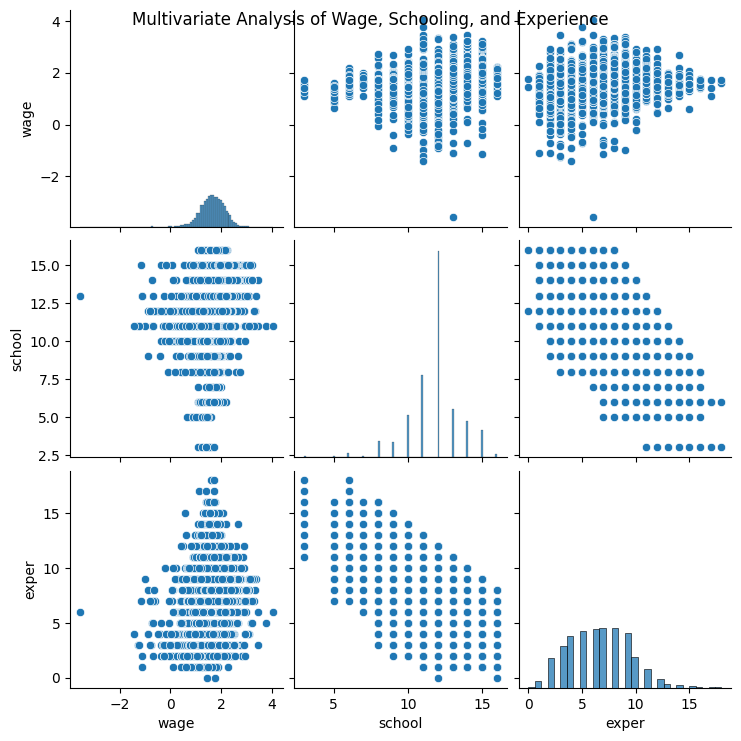

In [28]:
plt.figure(figsize=(10, 6))
sns.pairplot(df_filled[['wage', 'school', 'exper']])
plt.suptitle('Multivariate Analysis of Wage, Schooling, and Experience')
plt.show()

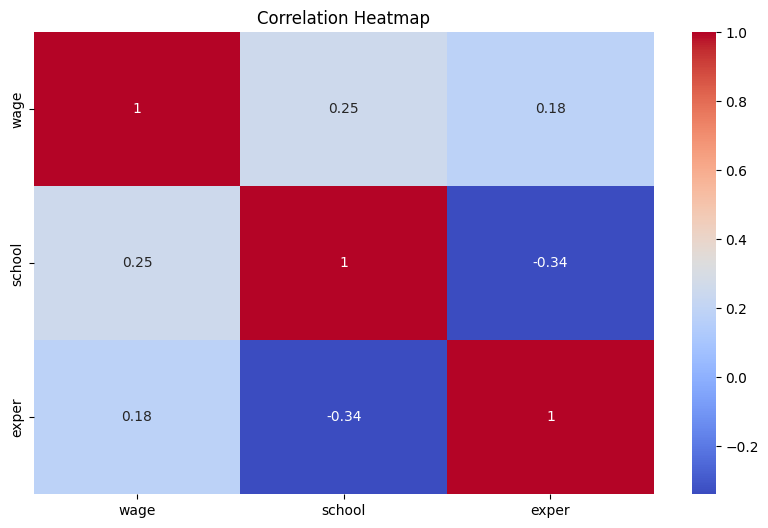

In [29]:
# Heatmap to show correlation among all numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df_filled[['wage', 'school', 'exper']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Time Series Analysis

In [38]:
#Setting year as time based index for TSA
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)

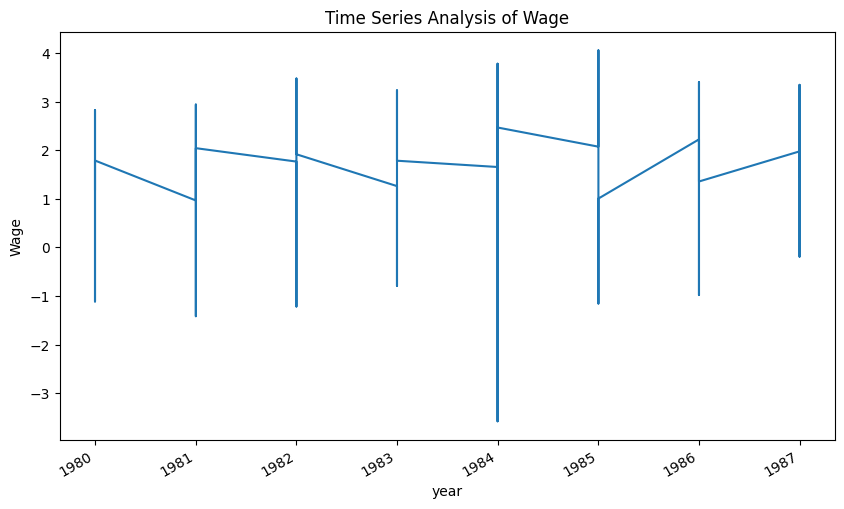

In [40]:
# Plotting time series data for 'wage'
plt.figure(figsize=(10, 6))
df['wage'].plot()
plt.title('Time Series Analysis of Wage')
plt.ylabel('Wage')
plt.show()

In [41]:
df_resampled = df['wage'].resample('Y').mean()

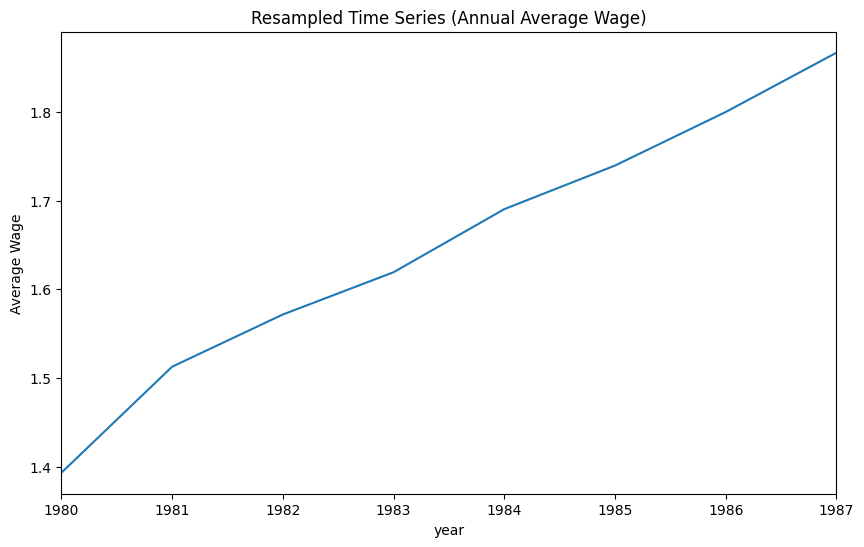

In [42]:
plt.figure(figsize=(10, 6))
df_resampled.plot()
plt.title('Resampled Time Series (Annual Average Wage)')
plt.ylabel('Average Wage')
plt.show()


In [43]:
grouped_data = df.groupby(df.index.year)['wage'].mean()

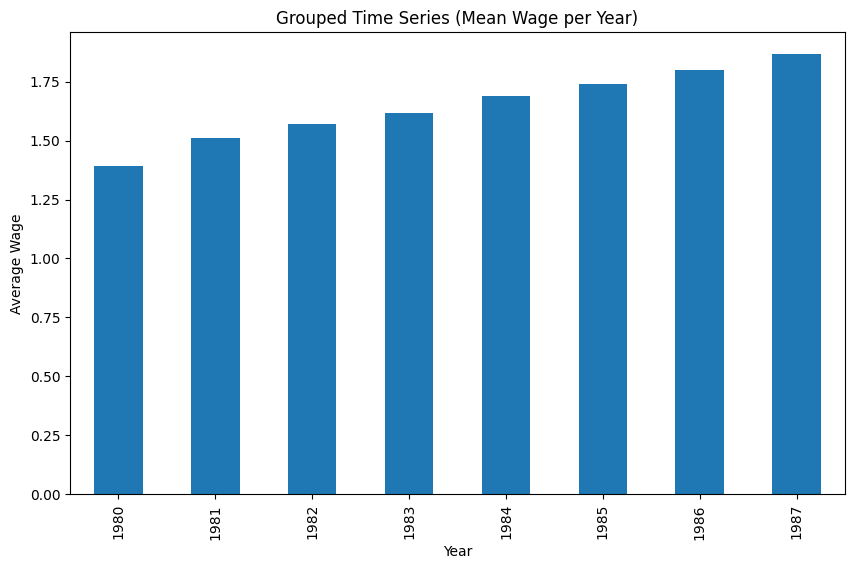

In [44]:
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title('Grouped Time Series (Mean Wage per Year)')
plt.ylabel('Average Wage')
plt.xlabel('Year')
plt.show()

**MODULE 4**

Library

In [45]:
import numpy as np

Statistical summary measures

In [46]:
summary = df.describe()
print(summary)

          rownames            nr       school        exper         wage
count  4360.000000   4360.000000  4360.000000  4360.000000  4360.000000
mean   2180.500000   5262.058716    11.766972     6.514679     1.649147
std    1258.767916   3496.149815     1.746181     2.825873     0.532609
min       1.000000     13.000000     3.000000     0.000000    -3.579079
25%    1090.750000   2329.000000    11.000000     4.000000     1.350717
50%    2180.500000   4569.000000    12.000000     6.000000     1.671143
75%    3270.250000   8406.000000    12.000000     9.000000     1.991086
max    4360.000000  12548.000000    16.000000    18.000000     4.051860


Specific summary statistics for a particular column

In [47]:
wage_summary = df['wage'].describe()
print("\nStatistical Summary for Wage Column:")
print(wage_summary)


Statistical Summary for Wage Column:
count    4360.000000
mean        1.649147
std         0.532609
min        -3.579079
25%         1.350717
50%         1.671143
75%         1.991086
max         4.051860
Name: wage, dtype: float64


Data Eloboration

In [49]:
#creatig new feature wage cateogry based on wage_bins
wage_bins = [df['wage'].min(), 1.5, 2.5, df['wage'].max()]
wage_labels = ['Low', 'Medium', 'High']
df['wage_category'] = pd.cut(df['wage'], bins=wage_bins, labels=wage_labels, include_lowest=True)

print("\nNew Wage Category Feature Added:")
print(df[['wage', 'wage_category']].head())


New Wage Category Feature Added:
                wage wage_category
year                              
1980-01-01  1.197540           Low
1981-01-01  1.853060        Medium
1982-01-01  1.344462           Low
1983-01-01  1.433213           Low
1984-01-01  1.568125        Medium


1-D Statistical Data Analysis

In [50]:
#Analyzing wage distribution
mean_wage = df['wage'].mean()
median_wage = df['wage'].median()
std_wage = df['wage'].std()

print("\n1-D Statistical Analysis for Wage Column:")
print(f"Mean: {mean_wage}, Median: {median_wage}, Standard Deviation: {std_wage}")


1-D Statistical Analysis for Wage Column:
Mean: 1.6491471906705277, Median: 1.6711431179, Standard Deviation: 0.5326094063484761


2-D Statistical Analysis

In [57]:
#Analyzing Wage vs Experience Correlation
correlation = df[['wage', 'exper']].corr()
print("\n2-D Statistical Analysis: Correlation between Wage and Experience:")
print(correlation)


2-D Statistical Analysis: Correlation between Wage and Experience:
           wage     exper
wage   1.000000  0.179405
exper  0.179405  1.000000


Contingency Tables

In [55]:
contingency_table = pd.crosstab(df['wage_category'], df['union'])
print("\nContingency Table between Wage Category and Union Membership:")
print(contingency_table)


Contingency Table between Wage Category and Union Membership:
union            no  yes
wage_category           
Low            1305  253
Medium         1882  777
High            109   34


n-D Statistical Data Analysis

In [58]:
n_d_correlation = df[['wage', 'exper', 'school']].corr()
print("\nN-Dimensional Statistical Data Analysis (Correlation between Wage, Experience, and Schooling):")
print(n_d_correlation)


N-Dimensional Statistical Data Analysis (Correlation between Wage, Experience, and Schooling):
            wage     exper    school
wage    1.000000  0.179405  0.252132
exper   0.179405  1.000000 -0.339251
school  0.252132 -0.339251  1.000000


Scatter plots

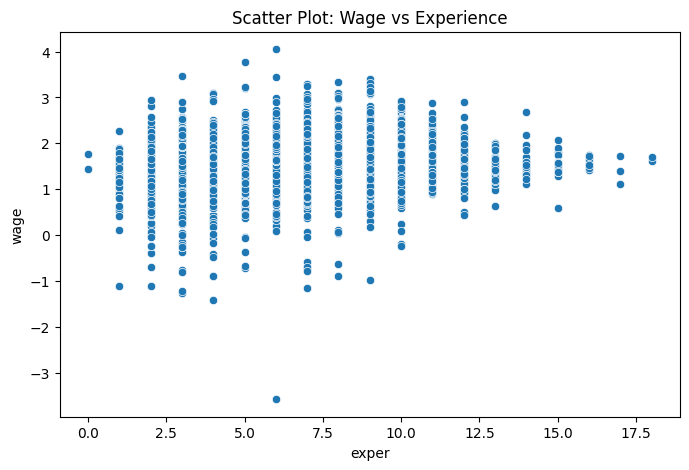

In [59]:
# Scatter Plot: Wage vs Experience
plt.figure(figsize=(8, 5))
sns.scatterplot(x='exper', y='wage', data=df)
plt.title('Scatter Plot: Wage vs Experience')
plt.show()

Dot chart

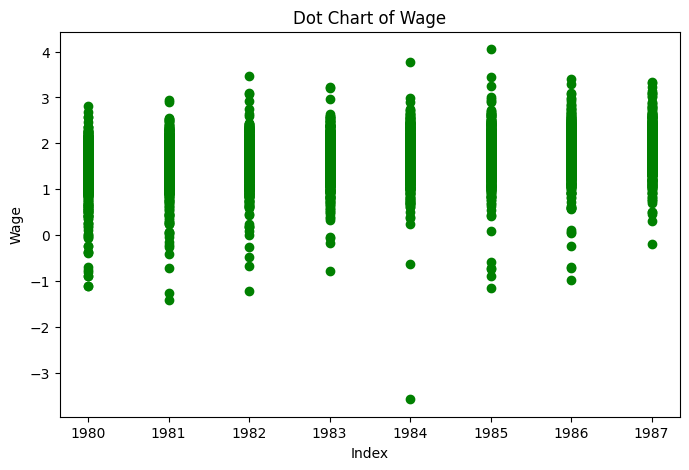

In [60]:
# Dot Chart for 'wage'
plt.figure(figsize=(8, 5))
plt.plot(df['wage'], 'o', color='green')
plt.title('Dot Chart of Wage')
plt.xlabel('Index')
plt.ylabel('Wage')
plt.show()

Bar Plots

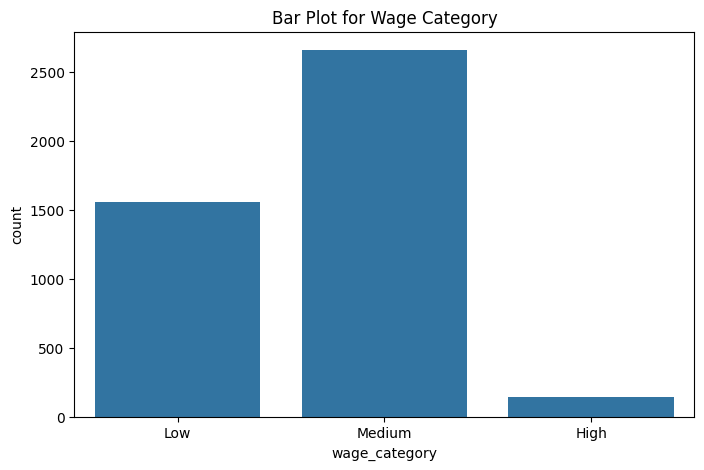

In [61]:
# Bar Plot for Wage Category
plt.figure(figsize=(8, 5))
sns.countplot(x='wage_category', data=df)
plt.title('Bar Plot for Wage Category')
plt.show()

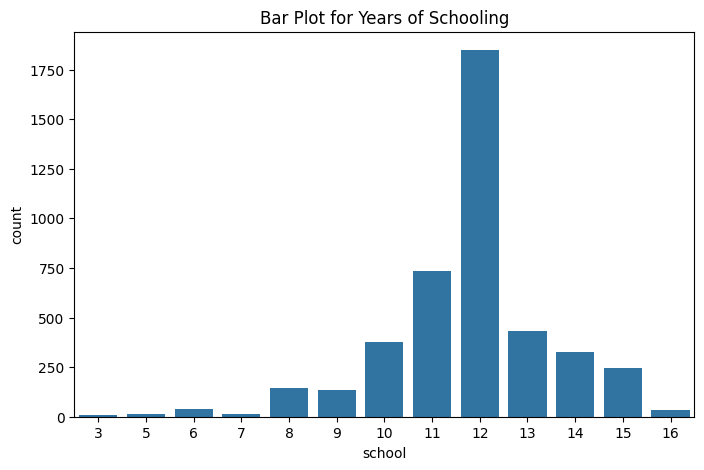

In [62]:
# Bar Plot for Years of Schooling
plt.figure(figsize=(8, 5))
sns.countplot(x='school', data=df)
plt.title('Bar Plot for Years of Schooling')
plt.show()